In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import csv
import pandas as pd

dataset = pd.read_csv('datasets/weatherAUS.csv')

dataset.drop('RISK_MM', axis=1, inplace=True)
categorical = []
numerical = []

for col in dataset.columns:
    if dataset.dtypes[col] == 'O':
        categorical.append(col)
    else:
        numerical.append(col)
print(categorical)
print(numerical)

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [2]:
# Convert Date to separate year, month and day values
dataset['Year'] = pd.to_datetime(dataset['Date']).dt.year
dataset['Month'] = pd.to_datetime(dataset['Date']).dt.month
dataset['Day'] = pd.to_datetime(dataset['Date']).dt.day
# Drop Date column, as we don't need it anymore
dataset.drop('Date', axis=1, inplace=True)
categorical.remove('Date')
numerical.append('Year')
numerical.append('Month')
numerical.append('Day')


In [3]:
pd.get_dummies(dataset['Location'])

,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
142189,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
142190,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
142191,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [4]:
for col in numerical:
    IQR = dataset[col].quantile(0.75) - dataset[col].quantile(0.25)
    max_outlier = dataset[col].quantile(0.75) + (IQR * 3)
    print(col + ", max: " + str(max_outlier) + ", count: " + str(np.where(dataset[col]>max_outlier, 1, 0).sum()))
    dataset[col] = np.where(dataset[col]>max_outlier, max_outlier, dataset[col])
    

MinTemp, max: 44.400000000000006, count: 0
MaxTemp, max: 59.1, count: 0
Rainfall, max: 3.2, count: 20462
Evaporation, max: 21.800000000000004, count: 471
Sunshine, max: 27.699999999999996, count: 0
WindGustSpeed, max: 99.0, count: 150
WindSpeed9am, max: 55.0, count: 107
WindSpeed3pm, max: 57.0, count: 81
Humidity9am, max: 161.0, count: 0
Humidity3pm, max: 153.0, count: 0
Pressure9am, max: 1050.9, count: 0
Pressure3pm, max: 1048.8000000000002, count: 0
Cloud9am, max: 25.0, count: 0
Cloud3pm, max: 22.0, count: 0
Temp9am, max: 49.5, count: 0
Temp3pm, max: 55.79999999999999, count: 0
Year, max: 2027.0, count: 0
Month, max: 27.0, count: 0
Day, max: 68.0, count: 0


In [5]:
# Fill the NaN numerical values with median
for col in numerical:
    col_median=dataset[col].median()
    dataset[col].fillna(col_median, inplace=True)
    
# Fill the NaN categorical values with mode
for col in categorical:
    dataset[col].fillna(dataset[col].mode()[0], inplace=True)

In [6]:
print(dataset.isnull().sum())


Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64


In [7]:
print(categorical)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


<AxesSubplot:>

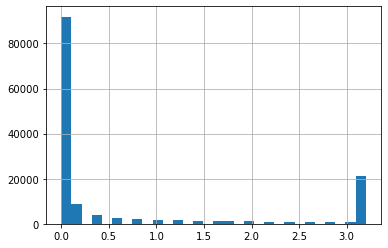

In [8]:
dataset['Rainfall'].hist(bins=30)

In [9]:
Y = dataset['RainTomorrow']
dataset.drop('RainTomorrow', axis=1, inplace=True)
categorical.remove('RainTomorrow')

In [10]:
X = dataset[numerical]

list_X = [X]
for col in categorical:
    list_X.append(pd.get_dummies(dataset[col]))
X = pd.concat(list_X, axis=1)
display(X)

display(list_X)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,S,SE,SSE,SSW,SW,W,WNW,WSW,No,Yes
0,13.4,22.9,0.6,4.8,8.5,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,1,0,1,0
1,7.4,25.1,0.0,4.8,8.5,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,1,1,0
2,12.9,25.7,0.0,4.8,8.5,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,1,1,0
3,9.2,28.0,0.0,4.8,8.5,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,1,0
4,17.5,32.3,1.0,4.8,8.5,41.0,7.0,20.0,82.0,33.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,3.5,21.8,0.0,4.8,8.5,31.0,15.0,13.0,59.0,27.0,...,0,0,0,0,0,0,0,0,1,0
142189,2.8,23.4,0.0,4.8,8.5,31.0,13.0,11.0,51.0,24.0,...,0,0,0,0,0,0,0,0,1,0
142190,3.6,25.3,0.0,4.8,8.5,22.0,13.0,9.0,56.0,21.0,...,0,0,0,0,0,0,0,0,1,0
142191,5.4,26.9,0.0,4.8,8.5,37.0,9.0,9.0,53.0,24.0,...,0,0,0,0,0,0,1,0,1,0


[        MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
 0          13.4     22.9       0.6          4.8       8.5           44.0   
 1           7.4     25.1       0.0          4.8       8.5           44.0   
 2          12.9     25.7       0.0          4.8       8.5           46.0   
 3           9.2     28.0       0.0          4.8       8.5           24.0   
 4          17.5     32.3       1.0          4.8       8.5           41.0   
 ...         ...      ...       ...          ...       ...            ...   
 142188      3.5     21.8       0.0          4.8       8.5           31.0   
 142189      2.8     23.4       0.0          4.8       8.5           31.0   
 142190      3.6     25.3       0.0          4.8       8.5           22.0   
 142191      5.4     26.9       0.0          4.8       8.5           37.0   
 142192      7.8     27.0       0.0          4.8       8.5           28.0   
 
         WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am

In [11]:
# Normalizamos los datos
from sklearn.preprocessing import MinMaxScaler

cols = X.columns
scaler = MinMaxScaler()

X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=[cols])

In [12]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [13]:
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

y_pred_test = logreg.predict(X_test)



In [14]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))


Model accuracy score: 0.8495


In [15]:
dirdf = pd.DataFrame(0.0, index=dataset['WindGustDir'].unique(), columns=['N', 'W', 'E', 'S'])

for dir in dataset['WindGustDir'].unique():
    dirs = dirdf.loc[dir,:]
    if len(dir) == 1:
        dirs[dir] = 1
    elif len(dir) == 2:
        dirs[dir[0]] = np.sin(np.pi/4)
        dirs[dir[1]] = np.sin(np.pi/4)
    else:
        for l in dir:
            if dirs[l] == 0:
                dirs[l] = np.sin(np.pi/8)
            else:
                dirs[l] = np.sin(3*np.pi/8)

winds = ['WindGustDir', 'WindDir9am', 'WindDir3pm']
windsdf = []
for wind in winds:
    windsdf.append(dirdf.loc[dataset[wind],:].reset_index(drop=True))
    categorical.remove(wind)

categorical = []
numerical = []

for col in dataset.columns:
    if dataset.dtypes[col] == 'O':
        categorical.append(col)
    else:
        numerical.append(col)
        
X = dataset[numerical]

list_X = [X]
for col in categorical:
    list_X.append(pd.get_dummies(dataset[col]))
for wind in windsdf:
    list_X.append(wind)
X = pd.concat(list_X, axis=1)

# Normalizamos los datos
from sklearn.preprocessing import MinMaxScaler

cols = X.columns
scaler = MinMaxScaler()

X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=[cols])


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

y_pred_test = logreg.predict(X_test)


from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))


Model accuracy score: 0.8495


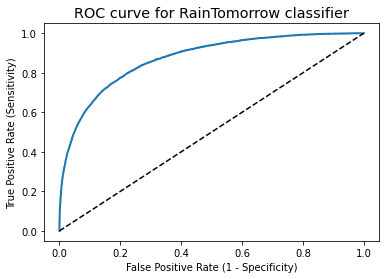

ROC AUC : 0.8714


In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
y_pred1 = logreg.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = 'Yes')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for RainTomorrow classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

In [23]:
def rain_classifier(dataset):

    # Drop the RISK_MM column following the dataset owner recomendation for classifiers.
    dataset = dataset.drop('RISK_MM', axis=1)

    # Dividing columns in numerical and categorical
    categorical = []
    numerical = []
    for col in dataset.columns:
        if dataset.dtypes[col] == 'O':
            categorical.append(col)
        else:
            numerical.append(col)

    # Convert Date to separate year, month and day values
    dataset['Year'] = pd.to_datetime(dataset['Date']).dt.year
    dataset['Month'] = pd.to_datetime(dataset['Date']).dt.month
    dataset['Day'] = pd.to_datetime(dataset['Date']).dt.day
    # Drop Date column, as we don't need it anymore
    dataset.drop('Date', axis=1, inplace=True)
    categorical.remove('Date')
    numerical.append('Year')
    numerical.append('Month')
    numerical.append('Day')

    # Limiting all numerical outliers to a maximum value, set to 3 interquantile ranges (IQR) starting from 75%.
    for col in numerical:
        IQR = dataset[col].quantile(0.75) - dataset[col].quantile(0.25)
        max_outlier = dataset[col].quantile(0.75) + (IQR * 3)
        #print(col + ", max: " + str(max_outlier) + ", count: " + str(np.where(dataset[col]>max_outlier, 1, 0).sum()))
        dataset[col] = np.where(dataset[col]>max_outlier, max_outlier, dataset[col])
    
    # Fill the NaN numerical values with median
    for col in numerical:
        col_median=dataset[col].median()
        dataset[col].fillna(col_median, inplace=True)
        
    # Fill the NaN categorical values with mode
    for col in categorical:
        dataset[col].fillna(dataset[col].mode()[0], inplace=True)

    # Setting Y value as whether if it will rain tomorrow or not, and dropping it from main dataset.
    Y = dataset['RainTomorrow']
    dataset.drop('RainTomorrow', axis=1, inplace=True)
    categorical.remove('RainTomorrow')

    # Setting X value as all the other columns, converting the categorical ones into dummy values 
    # Dummy values are binary columns for each category in the original column, for whether the row 
    # belongs to that category or not.
    X = dataset[numerical]
    list_X = [X]
    for col in categorical:
        list_X.append(pd.get_dummies(dataset[col]))
    X = pd.concat(list_X, axis=1)

    # Normalize all data
    cols = X.columns
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    X = pd.DataFrame(X, columns=[cols])

    # Split X and Y data into train and test, with a 70%/30% ratio.
    # This also randomizes the data order before splitting the top 70% and the last 30%.
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

    # instantiate the model
    logreg = LogisticRegression(solver='liblinear', random_state=0)


    # fit the model
    logreg.fit(X_train, y_train)

    y_pred_test = logreg.predict(X_test)

    #print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
    return accuracy_score(y_test, y_pred_test)

In [33]:
dataset = pd.read_csv('datasets/weatherAUS.csv')

base_score = rain_classifier(dataset)
print("Base: {0:0.4f}".format(base_score))
dataset = pd.read_csv('datasets/weatherAUS.csv')
for col in dataset.columns:
    if col in ['Date', 'RISK_MM', 'RainTomorrow']:
        continue
    dataset2 = dataset.drop(col, axis=1)
    score = rain_classifier(dataset2)
    
    better = ""
    if score >= base_score:
        better = "!!"
    print("Dropping " + col + ": {0:0.4f}".format(score) + better)

Base: 0.8495
Dropping Location: 0.8445
Dropping MinTemp: 0.8499!!
Dropping MaxTemp: 0.8495
Dropping Rainfall: 0.8488
Dropping Evaporation: 0.8496!!
Dropping Sunshine: 0.8493
Dropping WindGustDir: 0.8494
Dropping WindGustSpeed: 0.8420
Dropping WindDir9am: 0.8495!!
Dropping WindDir3pm: 0.8491
Dropping WindSpeed9am: 0.8495!!
Dropping WindSpeed3pm: 0.8483
Dropping Humidity9am: 0.8493
Dropping Humidity3pm: 0.8380
Dropping Pressure9am: 0.8482
Dropping Pressure3pm: 0.8471
Dropping Cloud9am: 0.8494
Dropping Cloud3pm: 0.8483
Dropping Temp9am: 0.8491
Dropping Temp3pm: 0.8496!!
Dropping RainToday: 0.8497!!


In [34]:
dataset = pd.read_csv('datasets/weatherAUS.csv')

for col in ['MinTemp', 'Evaporation', 'WindDir9am', 'WindSpeed9am', 'Temp3pm', 'RainToday']:
    if col in ['Date', 'RISK_MM', 'RainTomorrow']:
        continue
    dataset.drop(col, axis=1, inplace=True)
score = rain_classifier(dataset)
print(score)

0.8491490458999484


In [35]:
print(score)

0.8491490458999484


In [36]:

base_score = rain_classifier(dataset)
print("Base: {0:0.4f}".format(base_score))
for col in dataset.columns:
    if col in ['Date', 'RISK_MM', 'RainTomorrow']:
        continue
    dataset2 = dataset.drop(col, axis=1)
    score = rain_classifier(dataset2)
    
    better = ""
    if score >= base_score:
        better = "!!"
    print("Dropping " + col + ": {0:0.4f}".format(score) + better)

Base: 0.8491
Dropping Location: 0.8439
Dropping MaxTemp: 0.8495!!
Dropping Rainfall: 0.8470
Dropping Sunshine: 0.8492!!
Dropping WindGustDir: 0.8492!!
Dropping WindGustSpeed: 0.8427
Dropping WindDir3pm: 0.8487
Dropping WindSpeed3pm: 0.8481
Dropping Humidity9am: 0.8496!!
Dropping Humidity3pm: 0.8346
Dropping Pressure9am: 0.8486
Dropping Pressure3pm: 0.8469
Dropping Cloud9am: 0.8494!!
Dropping Cloud3pm: 0.8484
Dropping Temp9am: 0.8495!!


In [37]:

for col in ['MaxTemp', 'Sunshine', 'WindGustDir', 'Humidity9am', 'Cloud9am', 'Temp9am']:
    if col in ['Date', 'RISK_MM', 'RainTomorrow']:
        continue
    dataset.drop(col, axis=1, inplace=True)
score = rain_classifier(dataset)
print(score)

0.8487739697125979


In [38]:

base_score = rain_classifier(dataset)
print("Base: {0:0.4f}".format(base_score))
for col in dataset.columns:
    if col in ['Date', 'RISK_MM', 'RainTomorrow']:
        continue
    dataset2 = dataset.drop(col, axis=1)
    score = rain_classifier(dataset2)
    
    better = ""
    if score >= base_score:
        better = "!!"
    print("Dropping " + col + ": {0:0.4f}".format(score) + better)

Base: 0.8488
Dropping Location: 0.8436
Dropping Rainfall: 0.8470
Dropping WindGustSpeed: 0.8420
Dropping WindDir3pm: 0.8491!!
Dropping WindSpeed3pm: 0.8485
Dropping Humidity3pm: 0.8154
Dropping Pressure9am: 0.8479
Dropping Pressure3pm: 0.8471
Dropping Cloud3pm: 0.8473


In [39]:

for col in ['WindDir3pm']:
    if col in ['Date', 'RISK_MM', 'RainTomorrow']:
        continue
    dataset.drop(col, axis=1, inplace=True)
score = rain_classifier(dataset)
print(score)

0.8491021613765296


In [40]:

base_score = rain_classifier(dataset)
print("Base: {0:0.4f}".format(base_score))
for col in dataset.columns:
    if col in ['Date', 'RISK_MM', 'RainTomorrow']:
        continue
    dataset2 = dataset.drop(col, axis=1)
    score = rain_classifier(dataset2)
    
    better = ""
    if score >= base_score:
        better = "!!"
    print("Dropping " + col + ": {0:0.4f}".format(score) + better)

Base: 0.8491
Dropping Location: 0.8437
Dropping Rainfall: 0.8456
Dropping WindGustSpeed: 0.8409
Dropping WindSpeed3pm: 0.8485
Dropping Humidity3pm: 0.8147
Dropping Pressure9am: 0.8471
Dropping Pressure3pm: 0.8454
Dropping Cloud3pm: 0.8466


In [42]:
droppable_cols = ['MinTemp', 'Evaporation', 'WindDir9am', 'WindSpeed9am', 'Temp3pm', 'RainToday', 'MaxTemp', 'Sunshine', 'WindGustDir', 'Humidity9am', 'Cloud9am', 'Temp9am', 'WindDir3pm']
dataset = pd.read_csv('datasets/weatherAUS.csv')
score = rain_classifier(dataset)
print(score)

for col in droppable_cols:
    if col in ['Date', 'RISK_MM', 'RainTomorrow']:
        continue
    dataset.drop(col, axis=1, inplace=True)
score = rain_classifier(dataset)
print(score)

0.8495006798255895
0.8491021613765296


In [43]:
dataset

,Date,Location,Rainfall,WindGustSpeed,WindSpeed3pm,Humidity3pm,Pressure9am,Pressure3pm,Cloud3pm,RISK_MM,RainTomorrow
0,2008-12-01,Albury,0.6,44.0,24.0,22.0,1007.7,1007.1,NaN,0.0,No
1,2008-12-02,Albury,0.0,44.0,22.0,25.0,1010.6,1007.8,NaN,0.0,No
2,2008-12-03,Albury,0.0,46.0,26.0,30.0,1007.6,1008.7,2.0,0.0,No
3,2008-12-04,Albury,0.0,24.0,9.0,16.0,1017.6,1012.8,NaN,1.0,No
4,2008-12-05,Albury,1.0,41.0,20.0,33.0,1010.8,1006.0,8.0,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,0.0,31.0,13.0,27.0,1024.7,1021.2,NaN,0.0,No
142189,2017-06-21,Uluru,0.0,31.0,11.0,24.0,1024.6,1020.3,NaN,0.0,No
142190,2017-06-22,Uluru,0.0,22.0,9.0,21.0,1023.5,1019.1,NaN,0.0,No
142191,2017-06-23,Uluru,0.0,37.0,9.0,24.0,1021.0,1016.8,NaN,0.0,No
